In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [2]:
!pip install catboost

In [3]:
import xgboost as xg
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [4]:
train_file = pd.read_csv(r"C:\Users\acer\Downloads\train\train.csv",sep = ";")
test_file = pd.read_csv("https://raw.githubusercontent.com/bolgebrygg/Force-2020-Machine-Learning-competition/master/lithology_competition/data/leaderboard_test_features.csv",sep = ';')

In [5]:
train_file_1 = train_file.copy()
test_file_1 = test_file.copy()

In [6]:
#30000: Sandstone
#65030: Sandstone/Shale
#65000: Shale
#80000: Marl
#74000: Dolomite
#70000: Limestone
#70032: Chalk
#88000: Halite
#86000: Anhydrite
#99000: Tuff
#90000: Coal
#93000: Basement

In [7]:
train_file_1.head(9)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
5,15/9-13,495.288,437641.96875,6470972.5,-470.261780,NORDLAND GP.,NaN,19.453100,NaN,1.585567,...,75.281410,NaN,NaN,-0.601600,NaN,NaN,NaN,NaN,65000,1.0
6,15/9-13,495.440,437641.96875,6470972.5,-470.413788,NORDLAND GP.,NaN,19.462496,NaN,1.576569,...,76.199951,NaN,NaN,-0.598369,NaN,NaN,NaN,NaN,65000,1.0
7,15/9-13,495.592,437641.96875,6470972.5,-470.565796,NORDLAND GP.,NaN,19.468800,NaN,1.587011,...,76.199951,NaN,NaN,-0.602039,NaN,NaN,NaN,NaN,65000,1.0
8,15/9-13,495.744,437641.96875,6470972.5,-470.717773,NORDLAND GP.,NaN,19.468800,NaN,1.613674,...,75.898796,NaN,NaN,-0.614364,NaN,NaN,NaN,NaN,65000,1.0


In [8]:
train_file_1.tail(9)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
1170502,7/1-2 S,3168.7044,444920.375,6421578.0,-3107.844727,VESTLAND GP.,Bryne Fm.,8.388196,0.816792,0.791694,...,28.106224,NaN,NaN,0.032547,NaN,NaN,26.022663,NaN,30000,2.0
1170503,7/1-2 S,3168.8564,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.405681,NaN,NaN,...,27.373590,NaN,NaN,0.048230,NaN,NaN,26.180634,NaN,30000,2.0
1170504,7/1-2 S,3169.0084,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.413844,NaN,NaN,...,27.219160,NaN,NaN,0.031453,NaN,NaN,26.340960,NaN,30000,2.0
1170505,7/1-2 S,3169.1604,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.421368,NaN,NaN,...,27.386860,NaN,NaN,0.000644,NaN,NaN,26.506441,NaN,30000,2.0
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0
1170510,7/1-2 S,3169.9204,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.294910,NaN,NaN,...,25.985943,NaN,NaN,-0.011398,NaN,NaN,27.342442,NaN,65030,2.0


In [9]:
test_file_1.head(9)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN
5,15/9-14,481.388001,423244.53125,6461862.5,-456.384430,NORDLAND GP.,NaN,19.2031,NaN,1.241381,...,37.630371,NaN,172.343338,NaN,NaN,-0.539374,0.130611,NaN,NaN,NaN
6,15/9-14,481.540001,423244.53125,6461862.5,-456.536438,NORDLAND GP.,NaN,19.2031,NaN,1.358391,...,37.403320,NaN,172.197586,NaN,NaN,-0.533637,0.130611,NaN,NaN,NaN
7,15/9-14,481.692001,423244.53125,6461862.5,-456.688416,NORDLAND GP.,NaN,19.2031,NaN,1.478114,...,37.143818,NaN,172.051788,NaN,NaN,-0.527703,0.130611,NaN,NaN,NaN
8,15/9-14,481.844001,423244.53125,6461862.5,-456.840424,NORDLAND GP.,NaN,19.2031,NaN,1.532573,...,36.397198,NaN,171.906036,NaN,NaN,-0.522703,0.130611,NaN,NaN,NaN


In [10]:
test_file_1.tail(9)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
136777,35/9-8,3223.7816,536226.0000,6794880.5,-3199.269043,BAAT GP.,Rannoch Fm.,8.4978,NaN,4.566399,...,NaN,8.5,27.338425,121.299988,NaN,0.054333,NaN,1.965157,32.851860,NaN
136778,35/9-8,3223.9336,536226.0000,6794880.5,-3199.420898,BAAT GP.,Rannoch Fm.,8.4978,NaN,4.652581,...,NaN,8.5,27.949579,120.173325,NaN,0.051077,NaN,2.007586,34.751648,NaN
136779,35/9-8,3224.0856,536225.9375,6794880.5,-3199.572998,BAAT GP.,Rannoch Fm.,8.4978,NaN,4.989797,...,NaN,8.5,28.910585,119.397202,NaN,0.050832,NaN,2.191974,35.285194,NaN
136780,35/9-8,3224.2376,536225.9375,6794880.5,-3199.724609,BAAT GP.,Rannoch Fm.,8.4978,NaN,5.779490,...,NaN,8.5,28.678873,118.934464,NaN,0.058811,NaN,2.509608,34.404530,NaN
136781,35/9-8,3224.3896,536225.9375,6794880.5,-3199.876465,BAAT GP.,Rannoch Fm.,8.4978,NaN,6.231942,...,NaN,8.5,26.615782,118.669212,NaN,0.063478,NaN,2.618309,33.523922,NaN
136782,35/9-8,3224.5416,536225.9375,6794880.5,-3200.028320,BAAT GP.,Rannoch Fm.,8.4978,NaN,6.038777,...,NaN,8.5,25.647141,118.468925,NaN,0.056791,NaN,2.620221,32.643795,NaN
136783,35/9-8,3224.6936,536225.9375,6794880.5,-3200.180176,BAAT GP.,Rannoch Fm.,8.4978,NaN,5.503983,...,NaN,8.5,23.929407,118.163177,NaN,0.002499,NaN,2.629171,31.763380,NaN
136784,35/9-8,3224.8456,536225.9375,6794880.5,-3200.332031,BAAT GP.,Rannoch Fm.,8.4978,NaN,4.895551,...,NaN,8.5,22.737293,117.655937,NaN,0.003363,NaN,2.521121,30.884350,NaN
136785,35/9-8,3224.9976,536225.9375,6794880.5,-3200.483887,BAAT GP.,Rannoch Fm.,8.4978,NaN,4.564547,...,NaN,8.5,21.116669,117.002289,NaN,0.001724,NaN,2.356035,29.962900,NaN


In [11]:
train_file_1.shape

(1170511, 29)

In [12]:
test_file_1.shape

(136786, 27)

In [13]:
train_file_1.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [14]:
test_file_1.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
count,136786.000000,136727.000000,1.367270e+05,136727.000000,131141.000000,39097.000000,136199.000000,136727.000000,119826.000000,136786.000000,...,66627.000000,66964.000000,68316.000000,43220.000000,13515.000000,111556.000000,20269.000000,11316.000000,55790.000000,29848.000000
mean,2501.136889,467884.598172,6.708199e+06,-2397.835918,12.613567,3.137817,3.844914,3.662074,2.324925,65.223264,...,43.528467,10.963364,26.406939,185.389543,0.160979,0.014441,6.028683,4.906861,22.669058,5.280645
std,1043.245788,35865.313917,1.352924e+05,937.001116,3.218969,17.293036,24.170949,23.242750,0.243602,31.146538,...,25.530487,1.839420,31.913763,63.173605,0.536332,0.054151,49.607255,22.963156,13.436052,55.475790
min,227.296008,423237.531250,6.461833e+06,-4362.296387,6.682522,0.255146,0.148474,0.152317,1.289989,6.342400,...,-24.132233,8.500000,0.004297,79.327354,-6.402187,-1.213720,0.129413,0.063258,0.572329,0.262056
25%,1707.948917,442441.406250,6.605454e+06,-3171.749634,9.049458,0.850029,0.933067,0.902655,2.116576,44.557275,...,31.179566,8.500000,12.240131,146.022373,0.027619,-0.001835,0.134206,0.543010,12.753529,1.081298
50%,2471.823595,455904.187500,6.759398e+06,-2442.877197,12.428942,1.416000,1.669926,1.657664,2.376285,60.110472,...,48.967999,12.250001,20.878899,175.515274,0.124714,0.009203,0.143792,1.435970,19.927827,1.587683
75%,3294.643006,485144.859375,6.822772e+06,-1681.509216,14.177558,2.578526,3.088695,2.894494,2.531131,82.757637,...,62.133951,12.250001,31.232986,204.037148,0.247048,0.026884,0.149783,4.425004,29.882400,3.274492
max,5007.417976,548460.437500,6.853315e+06,-205.295288,27.344881,1566.168457,1901.766602,1582.094482,3.073430,500.878357,...,125.522781,17.500000,621.078247,494.096802,7.362912,0.404614,426.921356,957.984436,131.990906,2000.000000


In [15]:
train_file_1.notna().sum()

WELL                                 1170511
DEPTH_MD                             1170511
X_LOC                                1159736
Y_LOC                                1159736
Z_LOC                                1159736
GROUP                                1169233
FORMATION                            1033517
CALI                                 1082634
RSHA                                  630650
RMED                                 1131518
RDEP                                 1159496
RHOB                                 1009242
GR                                   1170511
SGR                                    69353
NPHI                                  765409
PEF                                   671692
DTC                                  1089648
SP                                    864247
BS                                    682657
ROP                                   535071
DTS                                   174613
DCAL                                  298833
DRHO      

In [16]:
test_file_1.notna().sum()

WELL         136786
DEPTH_MD     136786
X_LOC        136727
Y_LOC        136727
Z_LOC        136727
GROUP        136786
FORMATION    129712
CALI         131141
RSHA          39097
RMED         136199
RDEP         136727
RHOB         119826
GR           136786
SGR               0
NPHI         104043
PEF          113503
DTC          135963
SP            66627
BS            66964
ROP           68316
DTS           43220
DCAL          13515
DRHO         111556
MUDWEIGHT     20269
RMIC          11316
ROPA          55790
RXO           29848
dtype: int64

In [60]:
train_file_1.corr()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
DEPTH_MD,1.000000,-0.078266,0.258393,-0.994761,-0.583351,0.090240,0.055476,0.051349,0.741904,0.098282,...,-0.012061,-0.553110,0.003915,0.000444,0.092773,0.043464,-0.377526,0.003960,-0.007422,-0.082604
X_LOC,-0.078266,1.000000,0.417225,0.086620,-0.119089,0.004157,0.012867,0.071869,0.086809,0.232408,...,0.034295,0.019872,-0.005978,0.003060,-0.048337,-0.015175,0.110223,0.142630,-0.016244,0.085848
Y_LOC,0.258393,0.417225,1.000000,-0.251269,-0.088677,-0.022042,0.030189,-0.085301,0.205928,0.192176,...,0.003498,-0.075089,-0.004558,0.001112,-0.067588,0.021894,-0.066518,-0.003680,-0.018719,-0.006759
Z_LOC,-0.994761,0.086620,-0.251269,1.000000,0.577283,-0.096993,-0.040089,-0.053246,-0.743765,-0.088711,...,0.009979,0.547174,-0.003989,-0.000548,-0.094118,-0.044206,0.386207,-0.002769,0.010507,0.079751
CALI,-0.583351,-0.119089,-0.088677,0.577283,1.000000,-0.011651,-0.042424,-0.030207,-0.570643,-0.240646,...,0.031061,0.480598,0.363297,0.000521,-0.060155,-0.015424,0.192494,-0.123407,0.072317,0.014551
RSHA,0.090240,0.004157,-0.022042,-0.096993,-0.011651,1.000000,0.178316,0.293445,0.078616,-0.074280,...,-0.008611,-0.134674,0.000492,-0.012619,0.044724,0.154494,-0.036224,0.062877,0.059277,0.012168
RMED,0.055476,0.012867,0.030189,-0.040089,-0.042424,0.178316,1.000000,0.131140,-0.008321,-0.015930,...,-0.007477,-0.121113,0.000895,-0.003927,-0.002924,0.050319,-0.068886,0.053110,-0.006774,0.019983
RDEP,0.051349,0.071869,-0.085301,-0.053246,-0.030207,0.293445,0.131140,1.000000,-0.039025,-0.097851,...,-0.005882,-0.096708,0.002652,-0.000086,0.000768,0.046408,-0.005252,0.078216,0.080111,-0.017818
RHOB,0.741904,0.086809,0.205928,-0.743765,-0.570643,0.078616,-0.008321,-0.039025,1.000000,0.165372,...,-0.008136,-0.694566,-0.024122,0.001683,0.036123,0.055732,-0.419315,0.044904,0.073774,-0.048642
GR,0.098282,0.232408,0.192176,-0.088711,-0.240646,-0.074280,-0.015930,-0.097851,0.165372,1.000000,...,0.036946,0.126999,-0.002210,0.000988,0.000666,-0.021022,-0.063477,-0.050393,0.163939,0.036349


In [18]:
train_file_1['FORMATION'].value_counts()

Utsira Fm.               172636
Kyrre Fm.                 94328
Lista Fm.                 71080
Heather Fm.               65041
Skade Fm.                 45983
                          ...  
Broom Fm.                   235
Intra Balder Fm. Sst.       177
Farsund Fm.                 171
Flekkefjord Fm.             118
Egersund Fm.                105
Name: FORMATION, Length: 69, dtype: int64

In [19]:
train_file_1['WELL'].value_counts()

25/2-7      25131
29/6-1      24464
25/7-2      23879
35/11-6     23544
34/2-4      23403
            ...  
25/11-15     2284
34/5-1 S     2273
34/3-1 A     2251
7/1-2 S      2040
16/1-2       1734
Name: WELL, Length: 98, dtype: int64

In [20]:
test_file_1['WELL'].value_counts()

34/10-16 R    25095
29/3-1        24213
15/9-14       20281
34/3-3 A      18190
35/6-2 S      13415
25/5-3        11324
25/10-10       9320
34/6-1 S       6479
35/9-8         4274
25/11-24       4195
Name: WELL, dtype: int64

In [ ]:
train_file_1.drop(train_file_1["SGR"])
train_file_1

In [56]:
set1 = ()
set1 = set(i for i in train_file_1["WELL"])
set1
list2 = list(set1)
set2 = ()
set2 = set(i for i in well1["X_LOC"])
set2
list3 = list(set2)
print(list3)
set3 = ()
set3 = set(i for i in well1["Y_LOC"])
set3
list4 = list(set3)

[487276.46875, 487276.4375, 487276.40625, 487276.375, 487276.34375, 487276.3125, 487276.28125, 487276.25, 487276.21875, 487276.1875, 487279.15625, 487279.125, 487279.09375, 487279.0625, 487279.03125, 487279.0, 487273.3125, 487273.28125, 487273.25, 487273.21875, 487273.1875, 487273.15625, 487273.125, 487273.09375, 487273.0625, 487273.03125, 487271.9375, 487271.90625, 487271.875, 487271.84375, 487271.8125, 487272.9375, 487272.90625, 487272.875, 487272.84375, 487272.8125, 487273.9375, 487273.90625, 487273.875, 487273.84375, 487273.8125, 487274.9375, 487274.90625, 487274.875, 487274.84375, 487274.8125, 487275.9375, 487275.90625, 487275.875, 487275.84375, 487275.8125, 487276.9375, 487276.90625, 487276.875, 487276.84375, 487276.8125, 487277.9375, 487277.90625, 487277.875, 487277.84375, 487277.8125, 487278.9375, 487278.90625, 487278.875, 487278.84375, 487278.8125, 487279.9375, 487279.90625, 487279.875, 487279.84375, 487279.8125, 487280.9375, 487280.90625, 487280.875, 487280.84375, 487280.8125

In [22]:
well1 = train_file_1[ train_file_1["WELL"] == list2[0]]

In [23]:
well1.head(9)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
288175,25/3-1,693.992,487292.09375,6643944.0,-671.968811,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.414816,NaN,-7.28125,-1.446468,0.958611,NaN,NaN,NaN,30000,2.0
288176,25/3-1,694.144,487292.09375,6643944.0,-672.120850,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.531128,NaN,-7.28125,-1.444222,0.958611,NaN,NaN,NaN,30000,2.0
288177,25/3-1,694.296,487292.09375,6643944.0,-672.272827,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.523112,NaN,-7.28125,-1.448340,0.958611,NaN,NaN,NaN,30000,2.0
288178,25/3-1,694.448,487292.09375,6643944.0,-672.424805,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.522704,NaN,-7.28125,-1.446208,0.958611,NaN,NaN,NaN,30000,2.0
288179,25/3-1,694.600,487292.09375,6643944.0,-672.576782,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.522300,NaN,-7.28125,-1.438606,0.958611,NaN,NaN,NaN,30000,2.0
288180,25/3-1,694.752,487292.09375,6643944.0,-672.728821,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.521944,NaN,-7.28125,-1.437540,0.958611,NaN,NaN,NaN,30000,2.0
288181,25/3-1,694.904,487292.09375,6643944.0,-672.880798,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.521588,NaN,-7.28125,-1.438867,0.958611,NaN,NaN,NaN,30000,2.0
288182,25/3-1,695.056,487292.09375,6643944.0,-673.032837,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.521188,NaN,-7.28125,-1.443703,0.958611,NaN,NaN,NaN,30000,2.0
288183,25/3-1,695.208,487292.09375,6643944.0,-673.184814,NORDLAND GP.,NaN,NaN,NaN,NaN,...,1.189216,NaN,-7.28125,-1.451065,0.958611,NaN,NaN,NaN,30000,2.0


In [24]:
train_file_1["GROUP"].value_counts()

HORDALAND GP.       293155
SHETLAND GP.        234028
VIKING GP.          131999
ROGALAND GP.        131944
DUNLIN GP.          119085
NORDLAND GP.        111490
CROMER KNOLL GP.     52320
BAAT GP.             35823
VESTLAND GP.         26116
HEGRE GP.            13913
ZECHSTEIN GP.        12238
BOKNFJORD GP.         3125
ROTLIEGENDES GP.      2792
TYNE GP.              1205
Name: GROUP, dtype: int64

In [25]:
test_file_1["GROUP"].value_counts()

SHETLAND GP.        46684
HORDALAND GP.       27149
DUNLIN GP.          15390
NORDLAND GP.        14605
ROGALAND GP.        11609
CROMER KNOLL GP.     6365
BAAT GP.             6282
VIKING GP.           5418
VESTLAND GP.         2682
HEGRE GP.             477
ZECHSTEIN GP.         125
Name: GROUP, dtype: int64

In [26]:
list1 = train_file_1.columns.values.tolist()
print(list1)
list1.remove("WELL")
list1.remove("DEPTH_MD")
print(list1)
len(list1)

['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']
['X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']


27

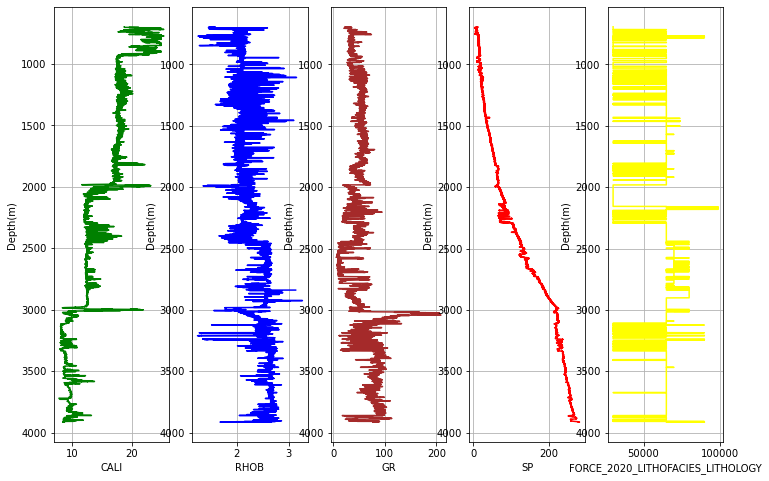

In [27]:
def plotter():
 f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
 logs = ['CALI','RHOB','GR','SP','FORCE_2020_LITHOFACIES_LITHOLOGY']
 colors = ['green','blue','brown','red','yellow']
 for i,log,color in zip(range(5),logs,colors):
   ax[i].plot(well1[log], well1['DEPTH_MD'],color = color)
   ax[i].invert_yaxis()
   ax[i].set_xlabel(log)
   ax[i].set_ylabel("Depth(m)")
   ax[i].grid()
plotter()

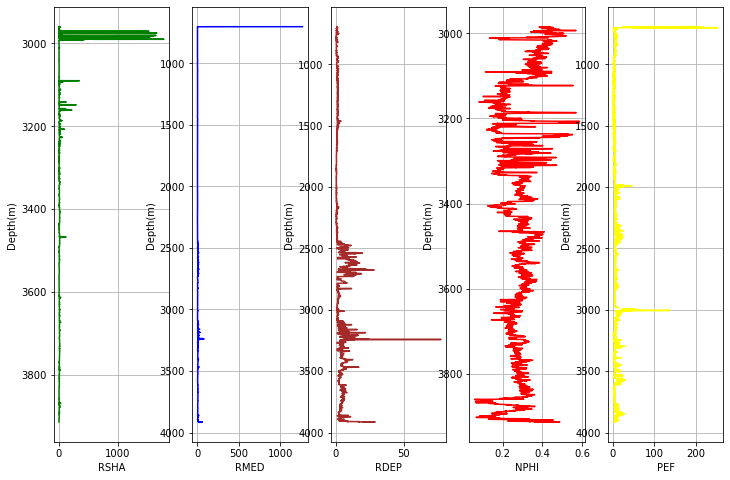

In [28]:
def plotter():
 f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
 logs = ['RSHA','RMED','RDEP','NPHI','PEF']
 colors = ['green','blue','brown','red','yellow']
 for i,log,color in zip(range(5),logs,colors):
   ax[i].plot(well1[log], well1['DEPTH_MD'],color = color)
   ax[i].invert_yaxis()
   ax[i].set_xlabel(log)
   ax[i].set_ylabel("Depth(m)")
   ax[i].grid()
plotter()

In [29]:
well2 = train_file_1[ train_file_1["WELL"] == list2[1]]

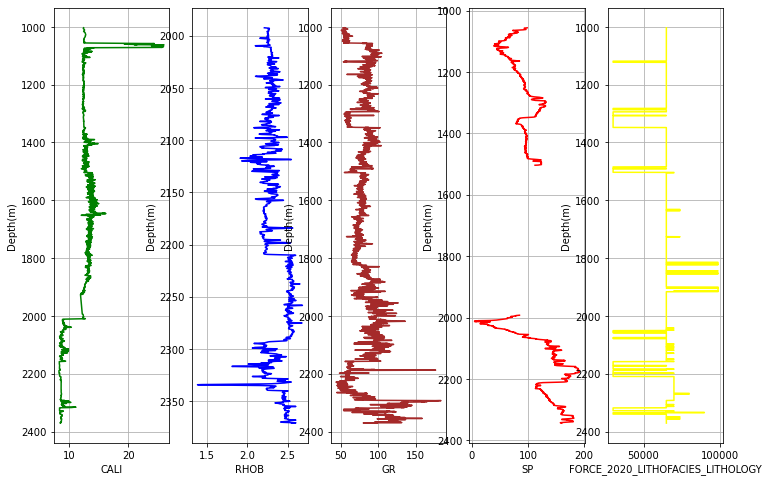

In [30]:
def plotter():
 f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
 logs = ['CALI','RHOB','GR','SP','FORCE_2020_LITHOFACIES_LITHOLOGY']
 colors = ['green','blue','brown','red','yellow']
 for i,log,color in zip(range(5),logs,colors):
   ax[i].plot(well2[log], well2['DEPTH_MD'],color = color)
   ax[i].invert_yaxis()
   ax[i].set_xlabel(log)
   ax[i].set_ylabel("Depth(m)")
   ax[i].grid()
plotter()

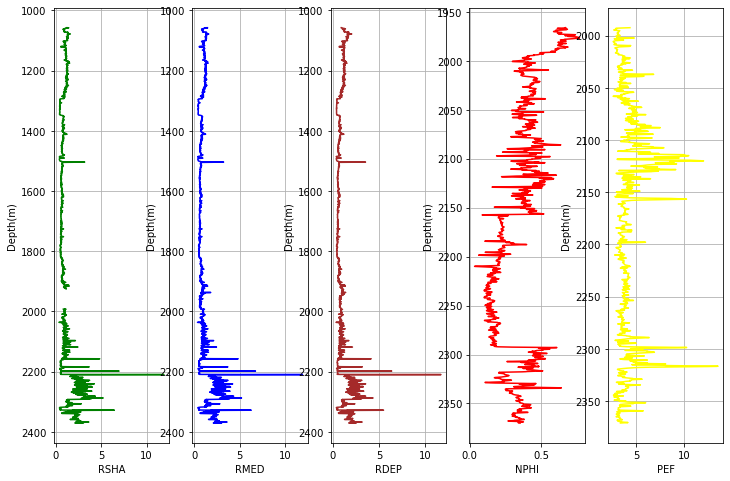

In [31]:
def plotter():
 f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
 logs = ['RSHA','RMED','RDEP','NPHI','PEF']
 colors = ['green','blue','brown','red','yellow']
 for i,log,color in zip(range(5),logs,colors):
   ax[i].plot(well2[log], well2['DEPTH_MD'],color = color)
   ax[i].invert_yaxis()
   ax[i].set_xlabel(log)
   ax[i].set_ylabel("Depth(m)")
   ax[i].grid()
plotter()

In [42]:
trial_train = train_file_1[["WELL","X_LOC","Y_LOC","DEPTH_MD", "RDEP", "RHOB", "GR", 
                "NPHI", "PEF", "DTC", "FORCE_2020_LITHOFACIES_LITHOLOGY"]].copy()

In [43]:
trial_train.head(9)

,WELL,X_LOC,Y_LOC,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY
0,15/9-13,437641.96875,6470972.5,494.528,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,437641.96875,6470972.5,494.680,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,437641.96875,6470972.5,494.832,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,437641.96875,6470972.5,494.984,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,437641.96875,6470972.5,495.136,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000
5,15/9-13,437641.96875,6470972.5,495.288,1.804719,1.879687,72.014420,NaN,43.657482,160.149292,65000
6,15/9-13,437641.96875,6470972.5,495.440,1.805498,1.878731,72.588089,NaN,42.236221,161.250381,65000
7,15/9-13,437641.96875,6470972.5,495.592,1.808367,1.867837,71.283051,NaN,39.933563,162.214416,65000
8,15/9-13,437641.96875,6470972.5,495.744,1.815813,1.847233,69.721436,NaN,39.163223,161.575104,65000


In [44]:
trial_train.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'NPD_LITHO'}, inplace=True)

In [45]:
trial_train.head(9)

,WELL,X_LOC,Y_LOC,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,NPD_LITHO
0,15/9-13,437641.96875,6470972.5,494.528,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,437641.96875,6470972.5,494.680,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,437641.96875,6470972.5,494.832,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,437641.96875,6470972.5,494.984,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,437641.96875,6470972.5,495.136,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000
5,15/9-13,437641.96875,6470972.5,495.288,1.804719,1.879687,72.014420,NaN,43.657482,160.149292,65000
6,15/9-13,437641.96875,6470972.5,495.440,1.805498,1.878731,72.588089,NaN,42.236221,161.250381,65000
7,15/9-13,437641.96875,6470972.5,495.592,1.808367,1.867837,71.283051,NaN,39.933563,162.214416,65000
8,15/9-13,437641.96875,6470972.5,495.744,1.815813,1.847233,69.721436,NaN,39.163223,161.575104,65000


In [46]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [47]:
simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

In [48]:
trial_train['LITH'] = trial_train['NPD_LITHO'].map(lithology_numbers)
trial_train['LITH_SI'] = trial_train['NPD_LITHO'].map(simple_lithology_numbers)

In [49]:
trial_train.head(9)

,WELL,X_LOC,Y_LOC,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,NPD_LITHO,LITH,LITH_SI
0,15/9-13,437641.96875,6470972.5,494.528,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000,Shale,3
1,15/9-13,437641.96875,6470972.5,494.680,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000,Shale,3
2,15/9-13,437641.96875,6470972.5,494.832,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000,Shale,3
3,15/9-13,437641.96875,6470972.5,494.984,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000,Shale,3
4,15/9-13,437641.96875,6470972.5,495.136,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000,Shale,3
5,15/9-13,437641.96875,6470972.5,495.288,1.804719,1.879687,72.014420,NaN,43.657482,160.149292,65000,Shale,3
6,15/9-13,437641.96875,6470972.5,495.440,1.805498,1.878731,72.588089,NaN,42.236221,161.250381,65000,Shale,3
7,15/9-13,437641.96875,6470972.5,495.592,1.808367,1.867837,71.283051,NaN,39.933563,162.214416,65000,Shale,3
8,15/9-13,437641.96875,6470972.5,495.744,1.815813,1.847233,69.721436,NaN,39.163223,161.575104,65000,Shale,3


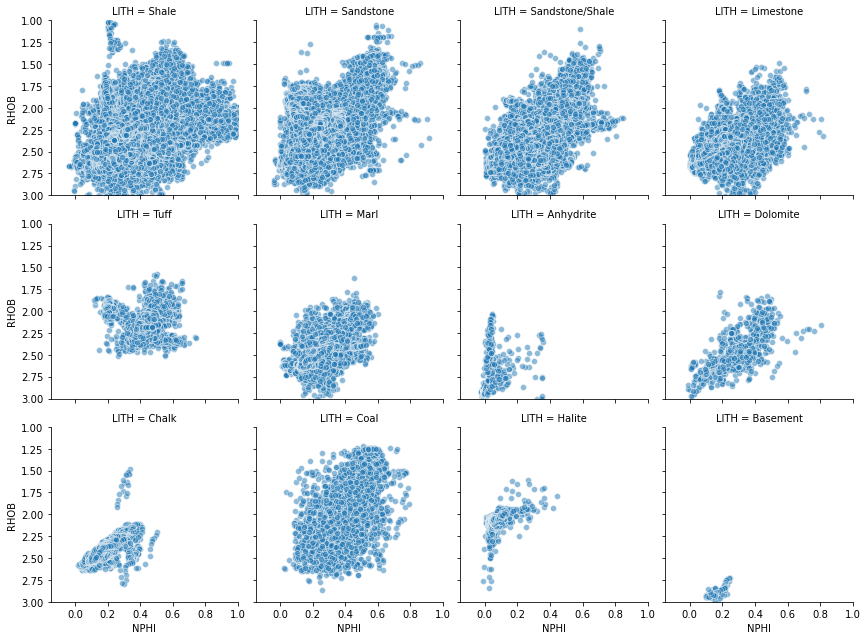

In [50]:
g = sns.FacetGrid(trial_train, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))